In [95]:
#importing all libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
drive.mount('/content/gdrive')

#Loading the dataset

In [41]:
# Read the contents of the .mod file
with open('/content/gdrive/MyDrive/Dataset/cleve.mod', 'r') as file:
    lines = file.readlines()

In [48]:
data_lines = [line.strip() for line in lines if not line.startswith('%') and line.strip()]

# Parse the data
parsed_data = [line.split() for line in data_lines]

# Define column names based on the provided attributes
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'health' ,'target']

# Create DataFrame
df = pd.DataFrame(parsed_data, columns=columns)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df[numeric_columns] = df[numeric_columns].astype(float)

#Displaying Dataset




In [50]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,health,target
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,male,notang,124.0,255.0,true,norm,175.0,fal,0.0,up,2.0,norm,buff,H
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,H
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  health    303 non-null    object 
 14  target    303 non-null    object 
dtypes: float64(6), object(9)
memory usage: 35.6+ KB


In [52]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,298.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.674497
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.938202
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


#Handling Null values

In [53]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,health,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
health      0
target      0
dtype: int64

In [61]:
df['ca'].fillna(df['ca'].mode().iloc[0], inplace=True) #Filling ca with most frequent class
df.dropna(subset=['thal'], inplace=True) # dropping rows having NaN in the thal column

In [63]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
health      0
target      0
dtype: int64

In [65]:
df = df.drop(columns=["target"]) #Dropping target column due to similarity with health column. They are same.

#Encoding

In [68]:
#use label encoder to encode the columns having Dtype object

le = LabelEncoder()
for column in df.select_dtypes(include='object'):
  df[column] = le.fit_transform(df[column])

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,health
0,63.0,1,1,145.0,233.0,1,1,150.0,0,2.3,0,0.0,0,0
1,67.0,1,2,160.0,286.0,0,1,108.0,1,1.5,1,3.0,1,1
2,67.0,1,2,120.0,229.0,0,1,129.0,1,2.6,1,2.0,2,1
3,37.0,1,3,130.0,250.0,0,2,187.0,0,3.5,0,0.0,1,0
4,41.0,0,0,130.0,204.0,0,1,172.0,0,1.4,2,0.0,1,0


#Data Scaling

In [79]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,health
0,0.708333,1.0,0.333333,0.481132,0.244292,1.0,0.5,0.603053,0.0,0.370968,0.0,0.000000,0.0,0.0
1,0.791667,1.0,0.666667,0.622642,0.365297,0.0,0.5,0.282443,1.0,0.241935,0.5,1.000000,0.5,1.0
2,0.791667,1.0,0.666667,0.245283,0.235160,0.0,0.5,0.442748,1.0,0.419355,0.5,0.666667,1.0,1.0
3,0.166667,1.0,1.000000,0.339623,0.283105,0.0,1.0,0.885496,0.0,0.564516,0.0,0.000000,0.5,0.0
4,0.250000,0.0,0.000000,0.339623,0.178082,0.0,0.5,0.770992,0.0,0.225806,1.0,0.000000,0.5,0.0


#Checking Imbalance

In [80]:
df_scaled.groupby('health').size().reset_index(name = "count")

,health,count
0,0.0,164
1,1.0,137


In [81]:
#Oversampling train data using SMOTE to match the majority class. Keeping original data for test

X = df_scaled.drop('health', axis=1)
y = df_scaled['health']

sm = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Splitting the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

oversampled_df = pd.concat([X_train, y_train], axis=1)

oversampled_df.groupby('health').size().reset_index(name = "count")

,health,count
0,0.0,136
1,1.0,136


In [82]:
oversampled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,health
0,0.250000,1.0,1.000000,0.339623,0.200913,0.0,0.5,0.740458,0.0,0.322581,0.500000,0.000000,0.5,0.0
1,0.541667,1.0,0.666667,0.622642,0.372146,0.0,0.5,0.564885,1.0,0.129032,0.500000,0.333333,1.0,1.0
2,0.208333,0.0,1.000000,0.000000,0.166667,0.0,1.0,0.824427,0.0,0.000000,1.000000,0.000000,0.5,0.0
3,0.333333,1.0,0.666667,0.094340,0.187215,0.0,0.5,0.587786,1.0,0.483871,0.500000,0.000000,0.5,0.0
4,0.000000,1.0,0.000000,0.339623,0.178082,0.0,0.5,1.000000,0.0,0.000000,1.000000,0.000000,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.657399,1.0,0.816585,0.288707,0.269846,0.0,0.5,0.348441,0.0,0.271031,0.724877,1.000000,0.5,1.0
268,0.596440,1.0,0.666667,0.317256,0.236779,0.0,0.5,0.396271,1.0,0.374350,0.500000,0.534950,1.0,1.0
269,0.530001,1.0,0.666667,0.283711,0.318295,0.0,0.5,0.307992,1.0,0.361936,0.500000,0.333333,1.0,1.0
270,0.611742,1.0,0.666667,0.289880,0.306351,0.0,0.5,0.467731,1.0,0.425220,0.500000,0.333333,1.0,1.0


#Feature Engineering

In [83]:
#Finding Correlation


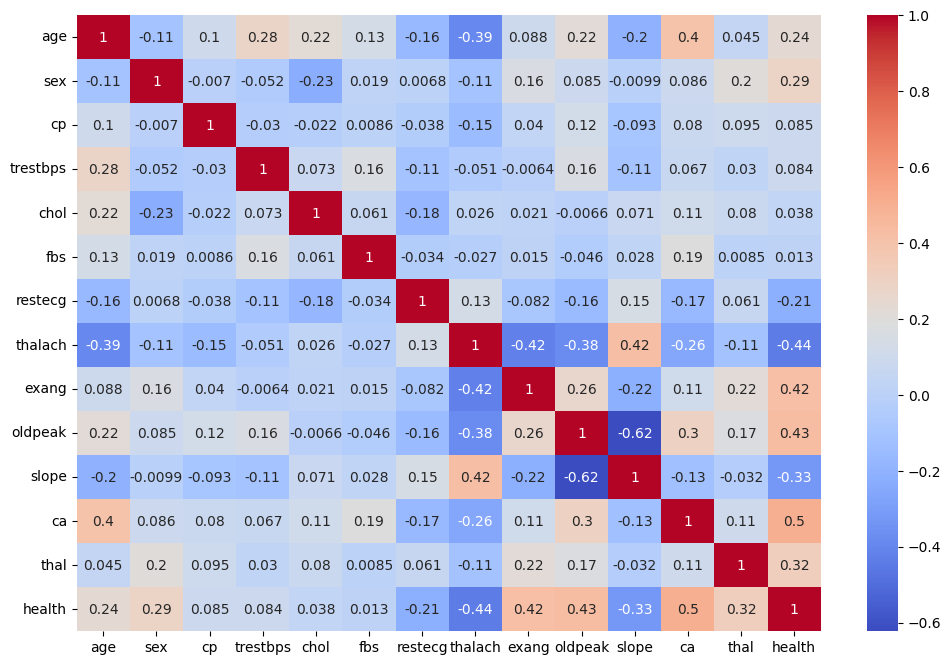

In [86]:
# heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(oversampled_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [87]:
# Find the correlation between each feature and the target
correlations = oversampled_df.corr()['health'].sort_values(ascending=False)

print(correlations)

health      1.000000
ca          0.502401
oldpeak     0.430772
exang       0.417465
thal        0.322726
sex         0.288416
age         0.238251
cp          0.085446
trestbps    0.084047
chol        0.037788
fbs         0.012938
restecg    -0.211819
slope      -0.331013
thalach    -0.440872
Name: health, dtype: float64


#Running models and Showing result

In [89]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [90]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [91]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro')
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')

# Recall
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')

# F1 Score
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

# Confusion Matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

Logistic Regression:
Accuracy: 0.7868852459016393
Precision: 0.7994505494505495
Recall: 0.79491341991342
F1 Score: 0.7866559052999731


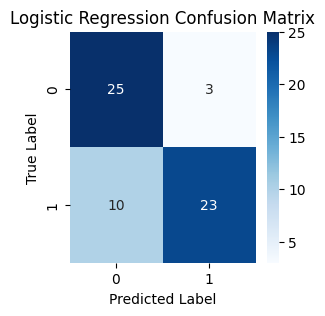

In [104]:
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

# Logistic Regression Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_logistic, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Random Forest:
Accuracy: 0.8524590163934426
Precision: 0.853225806451613
Recall: 0.8555194805194806
F1 Score: 0.8523002421307506


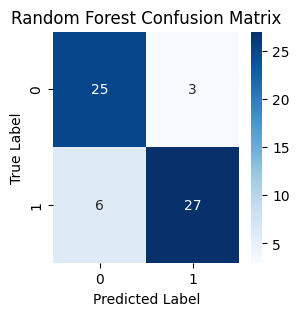

In [100]:
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Random Forest Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

XGBoost:
Accuracy: 0.8688524590163934
Precision: 0.8682795698924731
Recall: 0.8706709956709957
F1 Score: 0.8685344827586207


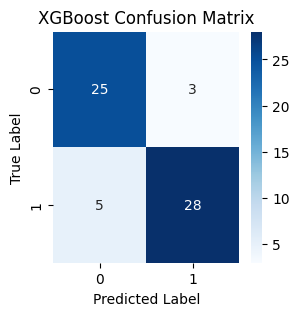

In [102]:
print("XGBoost:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

# XGBoost Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_xgb, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()